# Load Imports and Data

In [1]:
from model.model import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [3]:
dfs = preprocess(alldat, verbose = True)
train, test = train_test_split(dfs)

[float64]   	session             	session number, indexed 0 - 38
[object]   	session_type        	session type, train / test
[object]   	mouse_name          	name of the mouse
[float64]   	trial_number        	trial number, indexed 0 to num_trials
[bool]   	go_trial            	true if go_trial, false if no-go trial
[float64]   	gocue               	time of go cue, in ms
[float64]   	response_time       	time of response, in ms
[float64]   	latency             	response time - go cue, in ms
[float64]   	mouse_resp          	mouse response for a given trial
[object]   	wheel_velocity      	velocity of the wheel
[object]   	wheel_acceleration  	acceleration of the wheel (first derivative of velocity)
[float64]   	feedback_onset      	feedback onset (reward or punishment)
[float64]   	feedback_type       	-1 if punish, 0 if none, 1 if reward
[float64]   	contrast_left       	left contrast
[float64]   	contrast_right      	right contrast
[float64]   	contrast_diff       	contrast left - co

In [4]:
train.head()

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,pres_difficulty,pres_acc,response_time_diff,past_acc,past_latency,past_difficulty,fut_go_trial,fut_acc,fut_latency,fut_difficulty
0,0.0,train,Cori,0.0,True,1027.216250,1150.203633,122.987383,1.0,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,0.0,1,0.249299,NaN,NaN,NaN,True,1.0,525.089054,0.5
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,0.5,1,-0.450212,1.0,122.987383,0.0,True,1.0,124.078016,0.5
2,0.0,train,Cori,2.0,True,825.213029,949.291045,124.078016,1.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0...",...,0.5,1,1.317511,1.0,525.089054,0.5,False,1.0,1505.189657,1.0
3,0.0,train,Cori,3.0,False,761.612015,2266.801672,1505.189657,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",...,1.0,1,-1.450026,1.0,124.078016,0.5,True,0.0,154.765410,0.5
4,0.0,train,Cori,4.0,True,662.010427,816.775837,154.765410,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,0.5,0,0.700331,1.0,1505.189657,1.0,False,0.0,330.288154,1.0


# Plot
Plot, like, everything. But not everything. Just some things.


In [5]:
print(train["go_trial"])

0         True
1         True
2         True
3        False
4         True
         ...  
10045     True
10046     True
10047     True
10048     True
10049     True
Name: go_trial, Length: 7814, dtype: bool


In [6]:
min(train["contrast_right"])

0.0

In [19]:
import seaborn as sns
sns.set()
def plots(df, y = "fut_latency", features = ["pres_acc", "fut_latency"], filter_: dict= None, hue = None):
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]

    for feature in features:
        if df[feature].dtype in [float, int]:
            if len(list(set(df[feature].dropna()))) < 10:
                plt.figure()
                sns.violinplot(df[feature], df[y])  
                plt.xlabel(feature)
                plt.ylabel(y)
            else: 
                plt.figure()
                sns.scatterplot(feature, y, data = df, hue=hue, alpha= 0.7)
                plt.xlabel(feature)
                plt.ylabel(y)

                
def histograms(df, x, by: str = '', fig:str = '', sub:str = '', filter_:dict = None, title = None):
    
    # Pull out all unique figure distinctions 
    if fig is not '':
        fig_list = sorted(set(df[fig]))
    else:
        fig_list = ['']
        
    # Pull out all unique subfigure distinctions 
    if sub is not '':
        sub_list = sorted(set(df[sub]))
    else:
        sub_list = ['']
        
    if by is not '':
        by_list = sorted(set(df[by]))
    else:
        by_list = ['']
    
    
    df.head()
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]
            
    df.head()
            
    for fig_i,fig_val in enumerate(fig_list):
        plt.figure(fig_i,figsize=(20,10));
        if fig_val is not '':
            df_fig = df[df[fig] == fig_val]
        else:
            df_fig = df
        for sub_i,sub_val in enumerate(sub_list):
            plt.subplot(np.ceil(np.sqrt(len(sub_list))), np.ceil(np.sqrt(len(sub_list))), sub_i+1)
            if sub_val is not '':
                df_sub = df_fig[df_fig[sub] == sub_val]
            else:
                df_sub = df_fig
            for by_i,by_val in enumerate(by_list):
                if by_val is not '':
                    df_by = df_sub[df_sub[by] == by_val]
                else:
                    df_by = df_sub

                sns.distplot(df_by[x],label = by + ' : ' + str(by_val),norm_hist=True)
#                     plt.hist(x = x, data = df_filtered[df_filtered[by]==val], density = True, alpha = 0.7, label = "%s: %s"%(by, val), bins = 15)
                plt.xlabel(x)
                plt.legend()
                plt.title(str(sub) + ' = ' + str(sub_val))
        plt.tight_layout()
        plt.suptitle(str(fig_val) + ' ' + str(x),fontweight='bold', fontsize=16)
        plt.subplots_adjust(top=0.90)
        plt.show()

In [20]:
train['lat_chg'] = train['latency'].diff()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


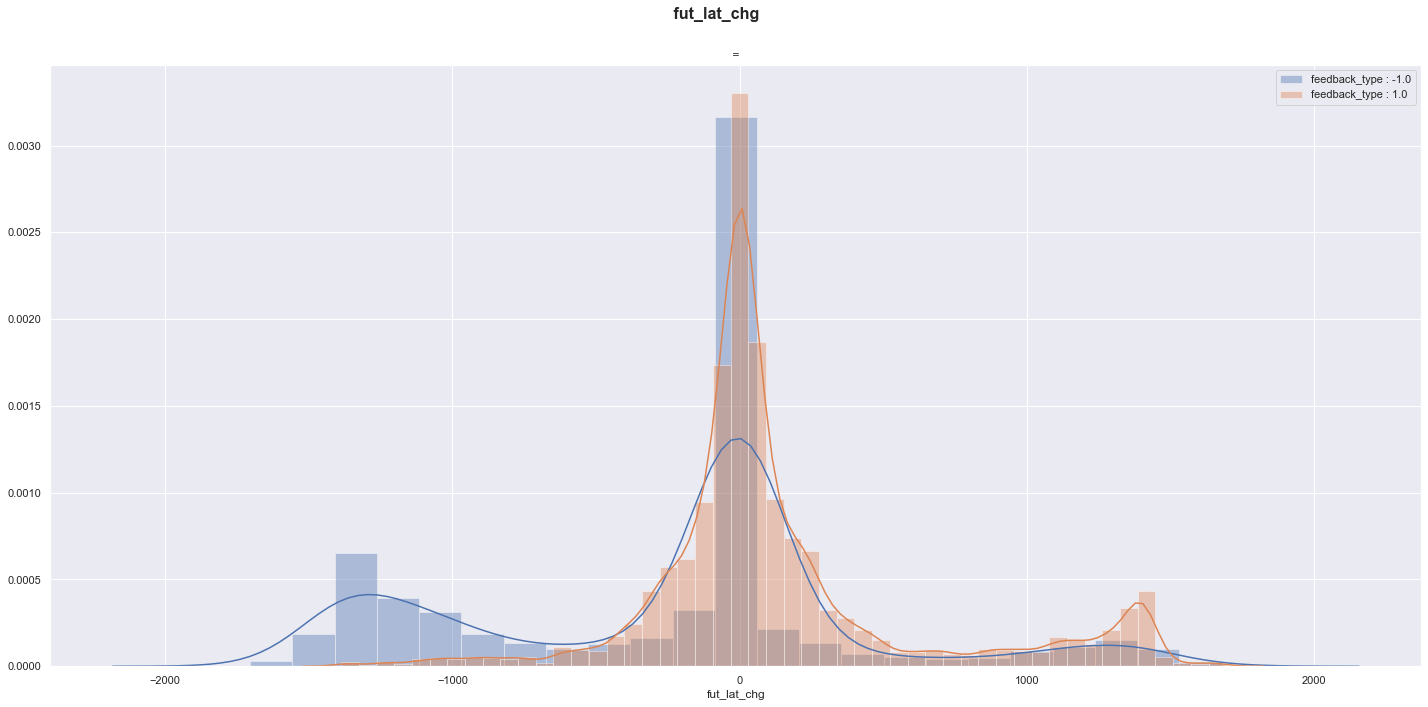

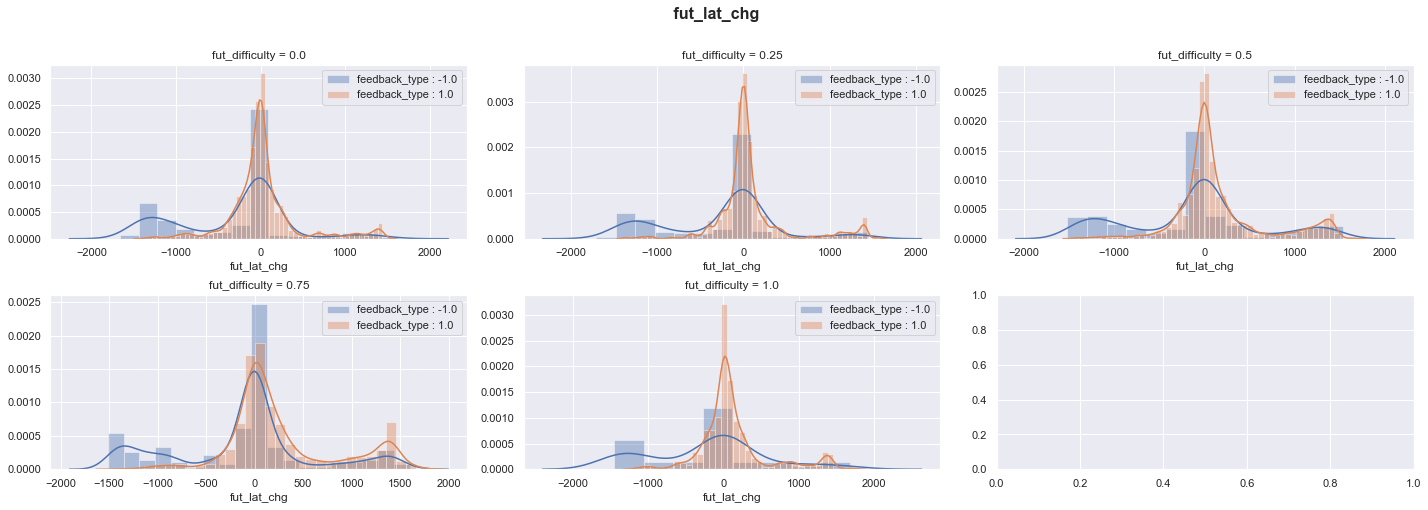

In [21]:
sns.set()
f = {"go_trial": True, "fut_go_trial": True}
# histograms(train, x="fut_lat_chg", by= "feedback_type",filter_ = f)
# histograms(train, x="latency", by= "feedback_type",filter_ = f)
histograms(train, x="lat_chg",filter_ = f)
histograms(train, x="lat_chg", by= "feedback_type",filter_ = f)
histograms(train, x="lat_chg", sub="pres_difficulty",by= "feedback_type", filter_ = f)
# histograms(train, x="latency", sub="pres_difficulty",by= "feedback_type", filter_ = f)